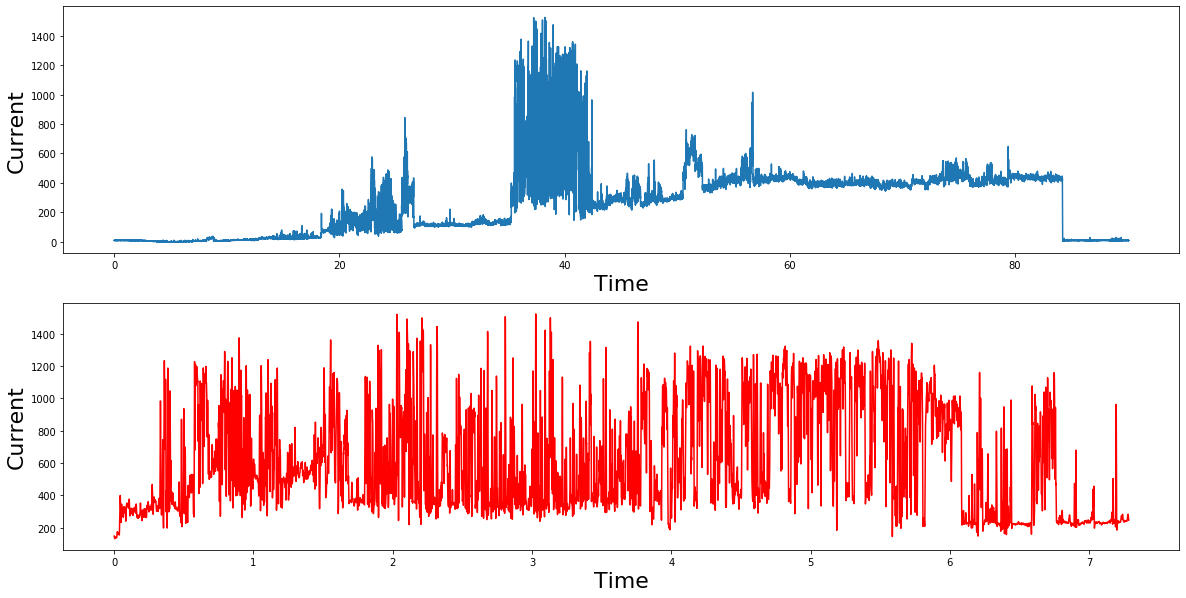

In [1]:
import numpy as np
import scipy as sp
from scipy import signal
from scipy import io
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.linalg import solveh_banded
from sklearn.preprocessing import normalize
from statistics import mean
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import sys
%matplotlib inline
data = sp.io.loadmat('clean_signal.mat')
time_col = [data['array'][i][0] for i in range(data['array'].shape[0])]
curr_col = [data['array'][i][1] for i in range(data['array'].shape[0])]
#print(len(curr_col), type(curr_col))

curr_col = np.array(curr_col)
#print("curr col shape", curr_col.shape)
curr_col_roi = curr_col[1761429:2125621]
#curr_col = curr_col.reshape(-1,1)
#curr_col = normalize(curr_col)

#Plot whole clean signal
fig, (ax1, ax2) = plt.subplots(2,1,sharex= False,figsize=(20,10))
ax1.plot(time_col,curr_col, label="Clean Signal")
ax1.set_ylabel('Current', size=22)
ax1.set_xlabel('Time', size=22)

#Plot the region of interest
ax2.plot((np.arange(len(curr_col_roi)))/50000,curr_col_roi, label="R.O.I", color='red')
ax2.set_ylabel('Current', size=22)
ax2.set_xlabel('Time', size=22)
plt.show()
plt.close()

C:\Users\smukhe33\anaconda3\lib\site-packages\matrixprofile\fluss.py:58: RuntimeWarning: invalid value encountered in true_divide
  idealized = cross_count / idealized
C:\Users\smukhe33\anaconda3\lib\site-packages\matrixprofile\fluss.py:61: RuntimeWarning: invalid value encountered in greater
  idealized[idealized > 1] = 1


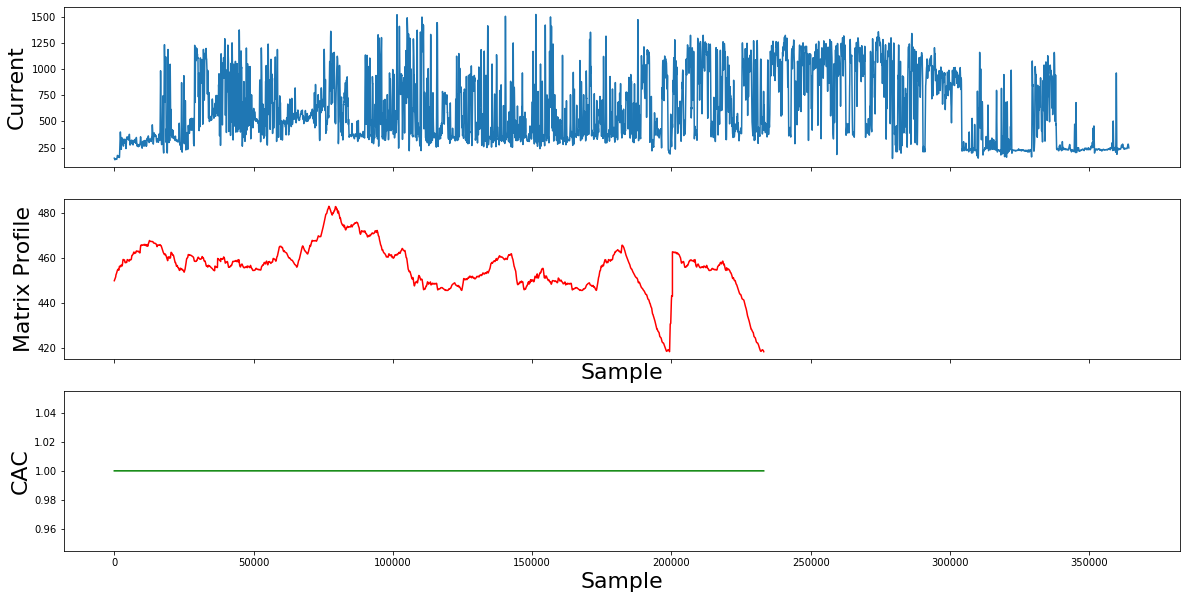

In [2]:
from matrixprofile import *
m = 2**17
mp = matrixProfile.scrimp_plus_plus(curr_col_roi,m)

# Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
cac = fluss.fluss(mp[1], m)
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(curr_col_roi)),curr_col_roi, label="Data")
ax1.set_ylabel('Current', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#Plot the CAC
ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green')
ax3.set_ylabel('CAC', size=22)
ax3.set_xlabel('Sample', size=22)

plt.show()
plt.close()

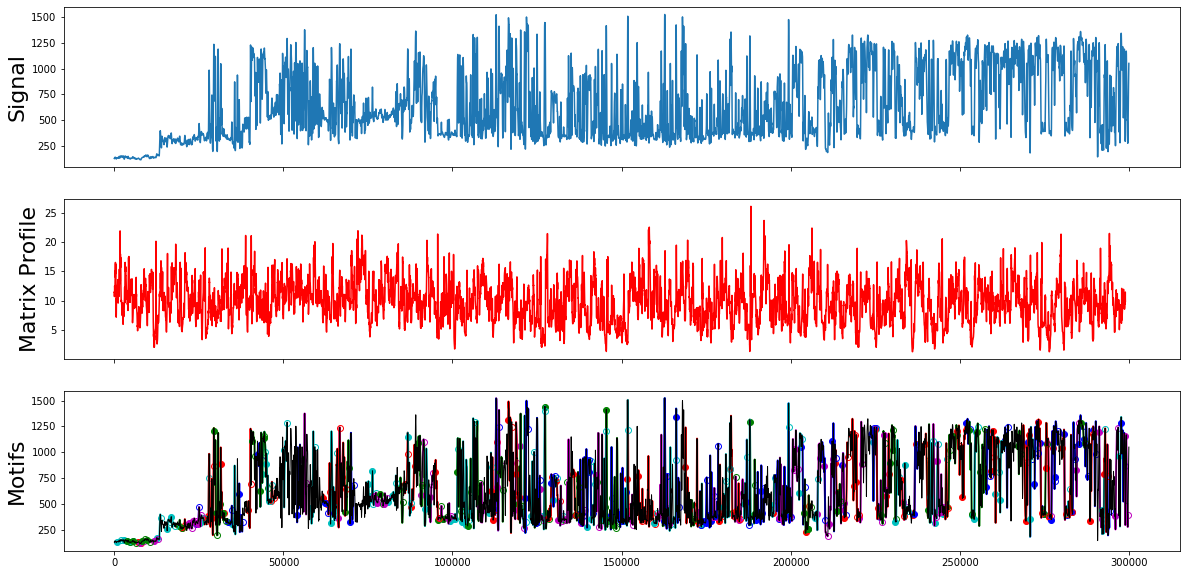

In [3]:


def plot_motifs(mtfs, labels, ax):

    colori = 0
    colors = 'rgbcm'
    for ms,l in zip(mtfs,labels):
        c =colors[colori % len(colors)]
        starts = list(ms)
        ends = [min(s + m,len(curr_col_roi)-1) for s in starts]
        ax.plot(starts, curr_col_roi[starts],  c +'o',  label=l)
        ax.plot(ends, curr_col_roi[ends],  c +'o', markerfacecolor='none')
        for nn in ms:
            ax.plot(range(nn,nn+m),curr_col_roi[nn:nn+m], c , linewidth=2)
        colori += 1

    ax.plot(curr_col_roi, 'k', linewidth=1, label="data")
    #ax.legend()
    
mtfs ,motif_d  = motifs.motifs(curr_col_roi, mp, max_motifs=100)
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(curr_col_roi)),curr_col_roi, label="ROI ")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)

#Plot the Motifs
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Motifs', size=22)
#plt.xlim((0,100))
plt.show()


<IPython.core.display.Javascript object>


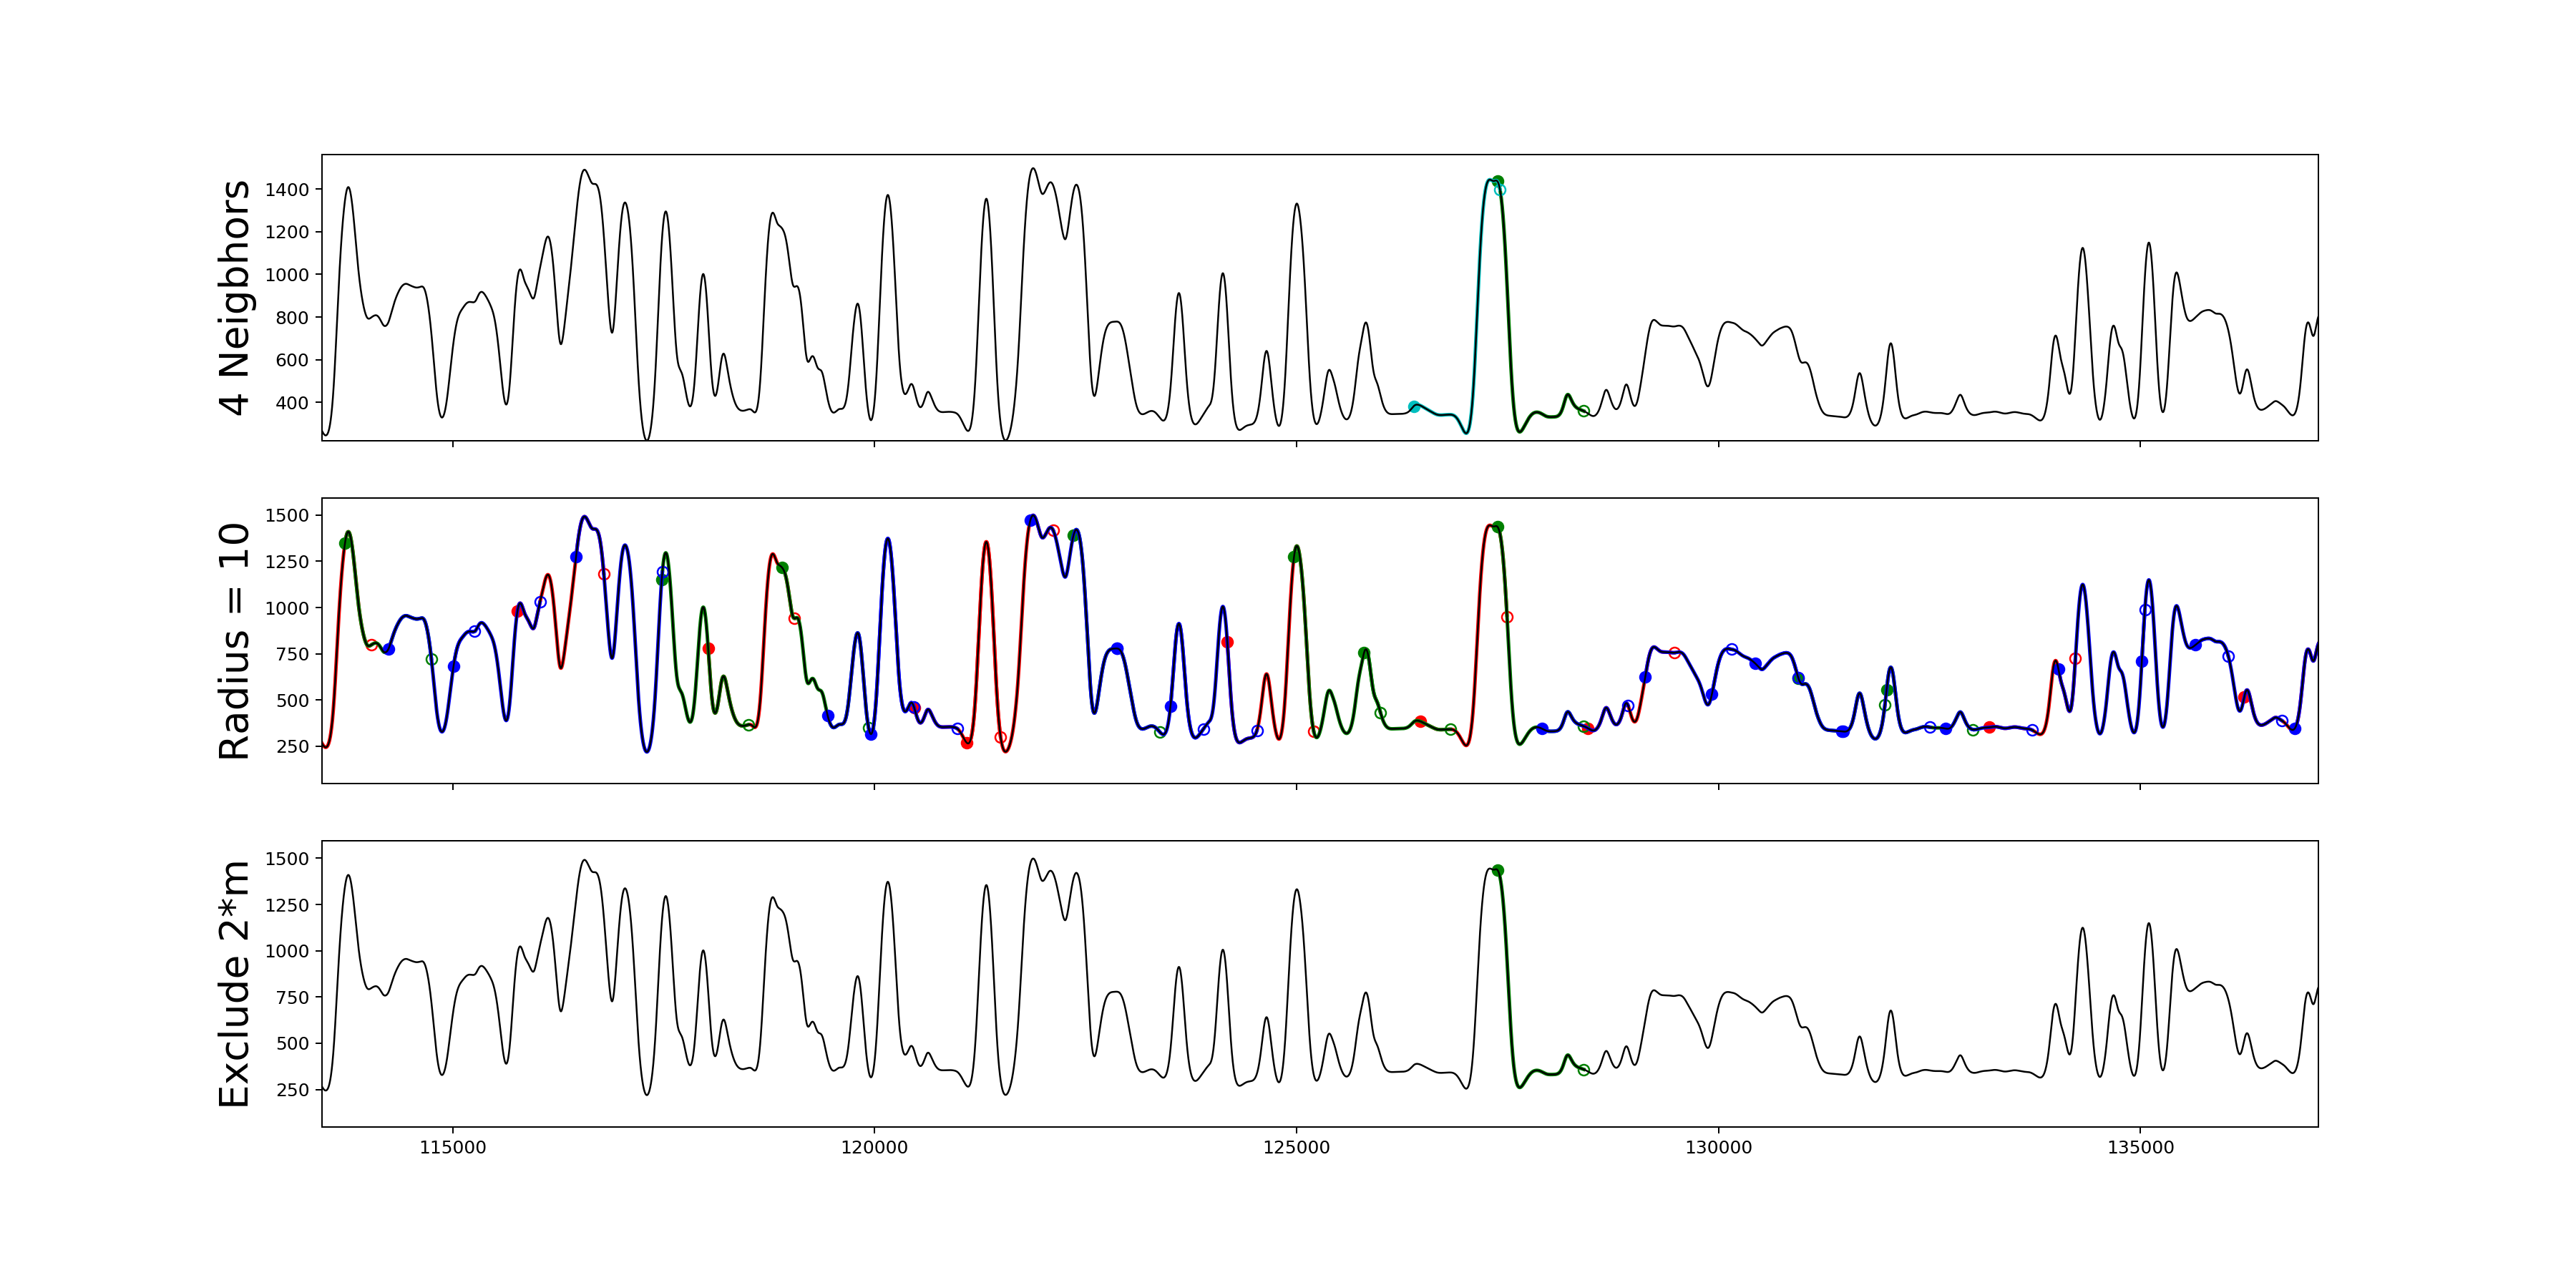

In [12]:
%matplotlib notebook
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))


mtfs ,motif_d  = motifs.motifs(curr_col_roi, mp, max_motifs=5, n_neighbors= 50)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax1)
ax1.set_ylabel('4 Neigbhors', size=22)

mtfs ,motif_d  = motifs.motifs(curr_col_roi, mp, max_motifs=5, radius=20)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax2)
ax2.set_ylabel('Radius = 10', size=22)

mtfs ,motif_d  = motifs.motifs(curr_col_roi, mp, max_motifs=5, ex_zone=2*m)
plot_motifs(mtfs, [f"{md:.3f}" for md in motif_d], ax3)
ax3.set_ylabel('Exclude 2*m', size=22)
plt.show()
